## Logistic regression with Scikit Learn

In this lab, we will use Scikit Learn to train the LogisticRegression Model. Activities:

  * Data analysis / visualization
  * Model fitting
  * Model evaluation with cross-validation
  * Improving the model with feature engineering techniques
  * Model regularization
  * Hyper-parameter tuning

### A few imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.colors as colors
from sklearn.metrics import classification_report,confusion_matrix, make_scorer,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

### Fetching data

In [2]:
# Fetch data

datapath = 'https://raw.githubusercontent.com/scienxlab/datasets/refs/heads/main/rpc/rpc-4-lithologies.csv' # Put your own path here
df = pd.read_csv(datapath)

### Activity 1: Data analysis

Describe the data set: which are the features, the different classes? Display statistics, correlations/cross-plots
Is the classification problem easy to solve?


In [2]:

### YOUR CODE: show the dataframe



In [3]:
# The data consist in samples from the rock property catalogs, compiled in https://agilescientific.com/blog/2015/10/5/the-rock-property-catalog-again, 
# compiled about Cretaceous shales in North America. 

### YOUR CODE: Which are the different lithologies




In [4]:
# Making a few plots to get to know the data:
# It looks like we could well discriminate data using a combination of 2 attributes. 

### YOUR CODE: Show a plot with colored cross-plots by lithology (use Matplotlib/Pandas scatterplot or Seaborn pairplot)


In [1]:
### YOUR CODE: Main statistics for each variable


In [5]:
### YOUR CODE: Can you refine these statistics by lithology?



In [6]:
### We will drop the lines with NaN values. We also drop the RPC column whisch is not relevant to our problem. The final data is called work_df




#### Activity 2: Logistic regression in Scikit Learn with evalution on test:

Normally, we should NOT look at the evaluation results on the test results before we have optimized the model. So to start with we will split the data twice with train/test split (take out 75 points each time)  

In [ ]:
#### Train, test split: Make a first split with 75 elements in the test group (call it xtest,ytest) and a second one (from the first train set) with again 75 elements
#  (call them xtrain_2,ytrain_2 and xval_2,yval_2)

### YOUR CODE    



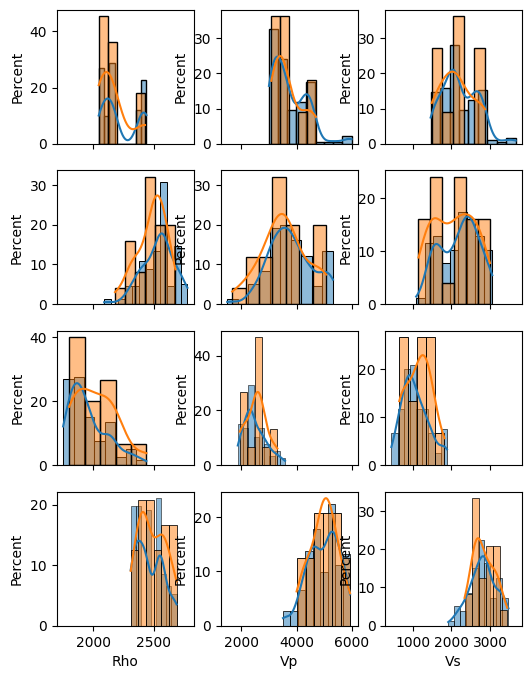

In [ ]:
# Some sanity checks: verify that train and test sets are coming from the same distributions: you can use crossplots/histograms...
# try to get these displays below...


In [7]:
## YOUR CODE: Present the main statistics of the different subgroups



In [8]:
### Model fitting: Define an instance of the Logistic Regression model and fit the model

 ### YOUR CODE


In [9]:
# Model coefficients: n_classes * n_features (remember: 1 vs rest model)


In [10]:
# Model intercept


In [11]:
### Predicting train and validation samples

### YOUR CODE


In [12]:
# predict proba



In [13]:
#### Classification report (on training/test)
### YOUR CODE


In [ ]:
### Let's break up this and visualize confusion matrix (show the two matrices one close to the other): Hint: use the ConfusionMatrixDisplay with from_predictions methods
### YOUR CODE

#confusion_matrix(y_train_2,y_pred_train_2)


In [ ]:
### Repeat the exercise with one feature or 2 features. Any comment?

### YOUR CODE

In [16]:
# YOUR CODE: You can test and experiment other evaluation metrics here


In [18]:
# Permutation importance?

We will now try Cross-validation approach. The model is fitted on each subfold. The cross-validation score for Logistic Regression is by default the accuracy. Note that the split is stratified by default.

In [19]:

# Define a model (no need to fit, and call the cross-val_score first with default values, then with precision_macro, recall_macro and f1_macro)
## YOUR SCORE


In [20]:
# Customized score



In [ ]:

## OPTIONAL: YOUR CODE define your own score with make_scoring: define first a scoring function taking ytrue and ypred 
# as arguments and pass it to the make_scorer function. use the result in the scoring argument of cross_val_score



#### Activity 3: Normalizing/Polynomial expansion
We investigate the effect f normalizing data: Retake the train data, normalize them add polynomial feature and then calculate a cross-validation score based on the resulting data. Compare with the original result




In [ ]:
### YOUR CODE: Transform xtrain using polynomial features (deg=3) / Normalization then calculate the cross_validation score and 
# the training score of your choice on model_cv (should be a new instance) 
#### ATTENTION: THIS IS NOT THE WAY YOU SHOULD DO IT ####


In [ ]:
# Fit the model and show the classification report

In [ ]:

### Optional: Test different scaler, evaluation...

#### Activity 4: Feature importance

We investigate the feature importance given by Scikit Learn. In option, program your own feature importance and compare with the SK Learn results. 

The estimator is required to be a fitted estimator. X can be the data set used to train the estimator or a hold-out set. The permutation importance of a feature is calculated as follows. First, a baseline metric, defined by scoring, is evaluated on a (potentially different) dataset defined by the X. Next, a feature column from the validation set is permuted and the metric is evaluated again. The permutation importance is defined to be the difference between the baseline metric and metric from permutating the feature column.

In [22]:
### YOUR CODE: Sort the feature by importance


In [23]:
## present the results (you can use the bar plot from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)


In [ ]:
### YOUR CODE optional: define a function calculating feature importance by shuffling one feature at a time and compare with previous result


#### Activity 5: Pipeline

We define now a pipeline to include the Normalizing/Polynomial Expansion/Logistic Regression

In [24]:
### YOUR CODE: calculate first a cross-val score as previous exercise


In [ ]:
### YOUR CODE: pass the polynomial degree to the pipeline and repeat the exercise



#### Activity 6: Regularization

Add regularization to the previous model. Observe the effect of L1 vs L2. Try low regularization (C=1e6, the default (C=1) and high (C=1e-6))

In [25]:
#### YOUR CODE: You should track the resulting scores .... again!


#### Activity 7: Hyper-parameter tuning

We define now Tune the parameters of the model: 
 - best polynomial degree?
 - Regularization method and strength (try logarithm scale)
 - learning rate
 - any other parameter you would like to test


In [26]:
#### YOUR CODE


# Congratulations ! 
you understand now logistic regression, your first ML model for classification. You are now ready for testing it on other data. 